In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


stats = pd.read_csv("baseball.csv")
stats

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,PHI,NL,1962,705,759,81,0.330,0.390,0.260,0,NaN,NaN,161,NaN,NaN
1228,PIT,NL,1962,706,626,93,0.321,0.394,0.268,0,NaN,NaN,161,NaN,NaN
1229,SFG,NL,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,NaN,NaN
1230,STL,NL,1962,774,664,84,0.335,0.394,0.271,0,NaN,NaN,163,NaN,NaN


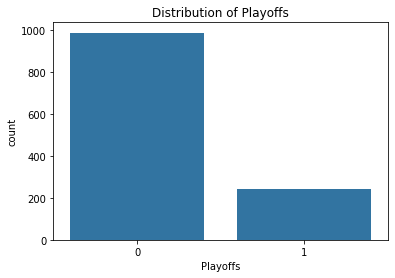

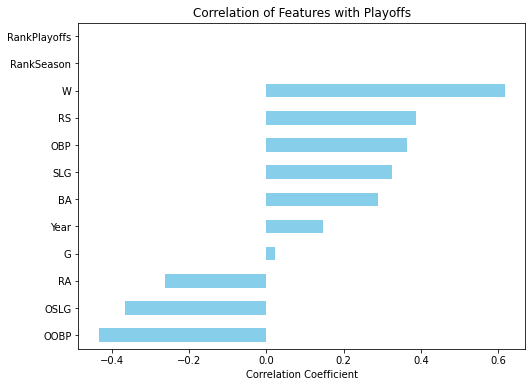

Team              0
League            0
Year              0
RS                0
RA                0
W                 0
OBP               0
SLG               0
BA                0
Playoffs          0
RankSeason      988
RankPlayoffs    988
G                 0
OOBP            812
OSLG            812
dtype: int64

In [24]:
# Check for missing values
missing_values = stats.isnull().sum()

# Visualize the distribution of the 'Playoffs' variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Playoffs', data=stats)
plt.title('Distribution of Playoffs')
plt.show()

numeric_features = stats.select_dtypes(include=['int64', 'float64']).drop(columns=['Playoffs'])  # Drop 'Playoffs' from predictors

correlations = numeric_features.corrwith(stats['Playoffs'])


# Plot the correlations with 'Playoffs'
plt.figure(figsize=(8, 6))
correlations.sort_values().plot(kind='barh', color='skyblue')
plt.title('Correlation of Features with Playoffs')
plt.xlabel('Correlation Coefficient')
plt.show()

# Display missing values
missing_values

In [26]:
#Splitting data into train validate and test catagories 
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, classification_report,accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


from sklearn.neighbors import KNeighborsClassifier



X = stats[['OBP','SLG','BA']]
y = stats['Playoffs']

# Split the dataset into training+validation and test sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training+validation set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)


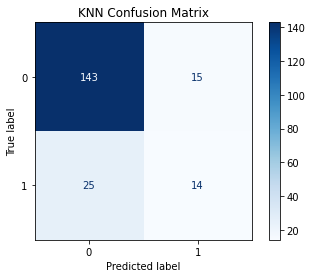

KNN Accuracy: 0.7969543147208121

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       158
           1       0.48      0.36      0.41        39

    accuracy                           0.80       197
   macro avg       0.67      0.63      0.64       197
weighted avg       0.78      0.80      0.79       197

Specificity: 0.9050632911392406


In [27]:
# Create a KNN classifier object
knn = KNeighborsClassifier(n_neighbors=5) 

# Fit the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the validation data
y_val_pred1 = knn.predict(X_val)
val_accuracy1 = accuracy_score(y_val, y_val_pred1)

conf_matrix1 = confusion_matrix(y_val, y_val_pred1)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix1)
disp.plot(cmap=plt.cm.Blues)
plt.title("KNN Confusion Matrix")
plt.show()
print('KNN Accuracy:',val_accuracy1)
test_accuracy = accuracy_score(y_val, y_val_pred1)

print("\nClassification Report:\n", classification_report(y_val, y_val_pred1))

tn, fp, fn, tp = confusion_matrix(y_val, y_val_pred1).ravel()

specificity = tn / (tn + fp)
print('Specificity:',specificity)

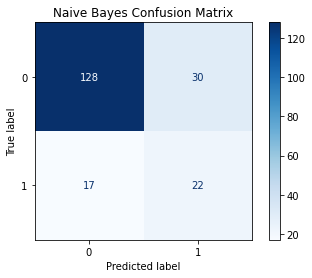


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.81      0.84       158
           1       0.42      0.56      0.48        39

    accuracy                           0.76       197
   macro avg       0.65      0.69      0.66       197
weighted avg       0.79      0.76      0.77       197

Specificity: 0.810126582278481


In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier
gnb.fit(X_train, y_train)

# Make predictions on the validation data
y_val_pred2 = gnb.predict(X_val)
val_accuracy2 = accuracy_score(y_val, y_val_pred2)

conf_matrix2 = confusion_matrix(y_val, y_val_pred2)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix2)
disp.plot(cmap=plt.cm.Blues)
plt.title("Naive Bayes Confusion Matrix")
plt.show()

print("\nClassification Report:\n", classification_report(y_val, y_val_pred2))

tn, fp, fn, tp = confusion_matrix(y_val, y_val_pred2).ravel()

# Calculate specificity
specificity = tn / (tn + fp)
print('Specificity:',specificity)

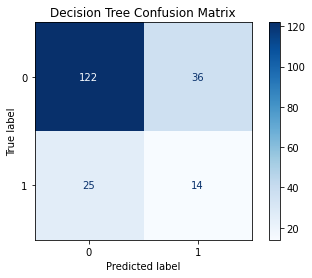


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80       158
           1       0.28      0.36      0.31        39

    accuracy                           0.69       197
   macro avg       0.55      0.57      0.56       197
weighted avg       0.72      0.69      0.70       197

Specificity: 0.7721518987341772


In [29]:
from sklearn.tree import DecisionTreeClassifier, plot_tree


# Create a Decision Tree classifier
dtc = DecisionTreeClassifier(random_state=42)

# Train the classifier
dtc.fit(X_train, y_train)

# Make predictions on the validation data
y_val_pred3 = dtc.predict(X_val)
val_accuracy3 = accuracy_score(y_val, y_val_pred3)

conf_matrix3 = confusion_matrix(y_val, y_val_pred3)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix3)
disp.plot(cmap=plt.cm.Blues)
plt.title("Decision Tree Confusion Matrix")
plt.show()
print("\nClassification Report:\n", classification_report(y_val, y_val_pred3))
tn, fp, fn, tp = confusion_matrix(y_val, y_val_pred3).ravel()

# Calculate specificity
specificity = tn / (tn + fp)
print('Specificity:',specificity)

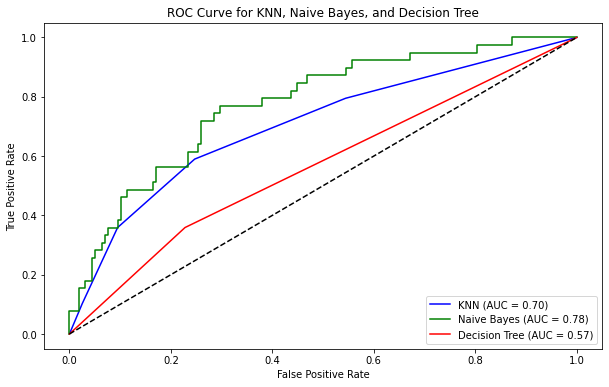

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score


probs_knn = knn.predict_proba(X_val)[:, 1]
probs_gnb = gnb.predict_proba(X_val)[:, 1]
probs_dtc = dtc.predict_proba(X_val)[:, 1]

# Calculate ROC curve values
fpr_knn, tpr_knn, _ = roc_curve(y_val, probs_knn)
fpr_gnb, tpr_gnb, _ = roc_curve(y_val, probs_gnb)
fpr_dtc, tpr_dtc, _ = roc_curve(y_val, probs_dtc)

# Calculate AUC for each model
auc_knn = roc_auc_score(y_val, probs_knn)
auc_gnb = roc_auc_score(y_val, probs_gnb)
auc_dtc = roc_auc_score(y_val, probs_dtc)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})', color='blue')
plt.plot(fpr_gnb, tpr_gnb, label=f'Naive Bayes (AUC = {auc_gnb:.2f})', color='green')
plt.plot(fpr_dtc, tpr_dtc, label=f'Decision Tree (AUC = {auc_dtc:.2f})', color='red')

# Plot the diagonal for random guessing
plt.plot([0, 1], [0, 1], linestyle='--', color='black')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN, Naive Bayes, and Decision Tree')
plt.legend(loc='lower right')
plt.show()

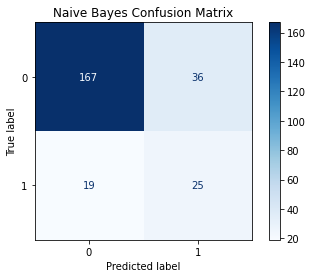


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.82      0.86       203
           1       0.41      0.57      0.48        44

    accuracy                           0.78       247
   macro avg       0.65      0.70      0.67       247
weighted avg       0.81      0.78      0.79       247

Specificity: 0.8226600985221675


In [31]:

# Make predictions on the test data
y_test_pred = gnb.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=test_conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title("Naive Bayes Confusion Matrix")
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_test_pred))
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

# Calculate specificity
specificity = tn / (tn + fp)
print('Specificity:',specificity)